# BMI6018 - Module 12 - Visualizations

Ram Gouripeddi  
Sukrut Shishupal  
Kolton Hauck

## Objective

To introduce visualizations packages and best practices using Python.

# BMI6018 - Module 12 - Introduction to Data Visualization with Python

**Ram Gouripeddi  
Sukrut Shishupal  
Kolton Hauck**

Data visualization is a crucial aspect of data analysis and interpretation. It involves the representation of data in graphical or pictoral form to extract meaningful insights. Python offers powerful libraries such as Matplotlib and Seaborn that make creating compelling visualizations easy.

## Why Visualization?

### 1. **Understanding Patterns and Trends:**
   Visualizations help in identifying patterns and trends in data that may not be apparent in raw numbers. They provide a clear and intuitive way to grasp complex relationships.

### 2. **Communication:**
   A well-crafted visualization is a powerful tool for communication. It makes it easier to convey findings to both technical and non-technical audiences.

### 3. **Exploratory Data Analysis (EDA):**
   Visualizations are a fundamental part of Exploratory Data Analysis (EDA). They allow you to explore the structure of your data, identify outliers, and understand the distribution of variables.

### 4. **Decision Making:**
   Visualizations aid in decision-making processes by providing a visual summary of the data. They empower you to make informed decisions based on a comprehensive understanding of the information at hand.

## Getting Started with Python Visualizations

In this notebook, we will explore basic visualization principles using the Matplotlib and Seaborn libraries.

### Imports

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [6]:
# Load our data
# Seaborn has several datasets you can use
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
# View the unique iris species
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

### Quick n' Dirty with DF plotting

<Axes: title={'center': 'Sepal Length vs Sepal Width'}, xlabel='sepal_length', ylabel='sepal_width'>

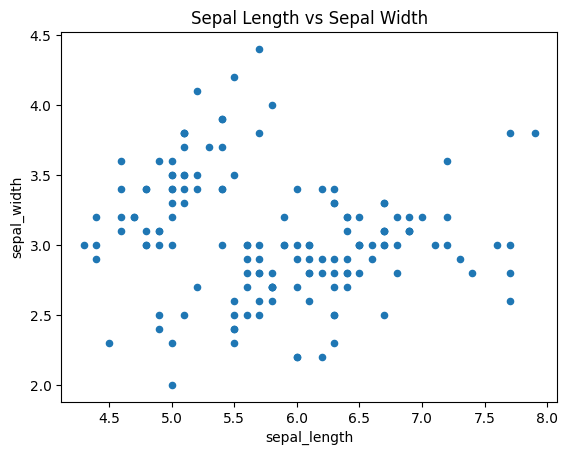

In [8]:
# Scatter plot
iris.plot.scatter(x='sepal_length', y='sepal_width', title='Sepal Length vs Sepal Width')

<Axes: title={'center': 'Sepal Length vs Sepal Width'}, xlabel='sepal_length', ylabel='sepal_width'>

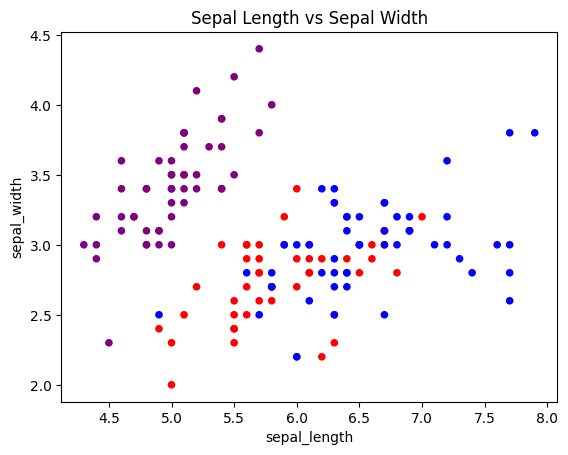

In [9]:
# Scatter plot w/different colors
# Need to specify colors for each point
colors = iris.species.map({
    'setosa': 'purple',
    'versicolor': 'red',
    'virginica': 'blue'
})
iris.plot.scatter(x='sepal_length', y='sepal_width', title='Sepal Length vs Sepal Width', color=colors)

<Axes: title={'center': 'Average Petal Length for Each Species'}, xlabel='species'>

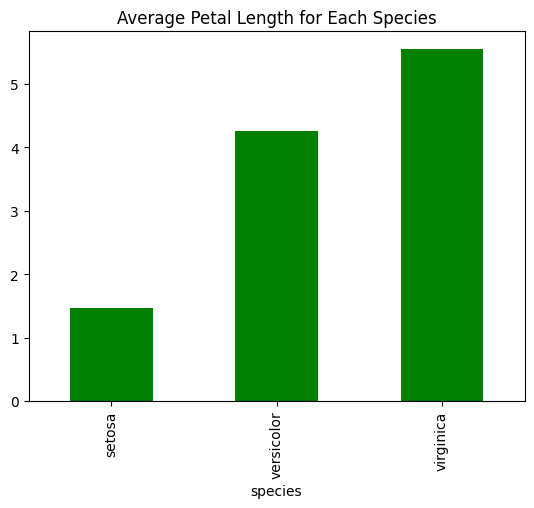

In [10]:
# Barchart
color = 'green'
# color = ['red', 'blue', 'green']
iris.groupby('species')['petal_length'].mean().plot(kind='bar', title='Average Petal Length for Each Species', color=color)

species
setosa        Axes(0.125,0.11;0.775x0.77)
versicolor    Axes(0.125,0.11;0.775x0.77)
virginica     Axes(0.125,0.11;0.775x0.77)
Name: petal_width, dtype: object

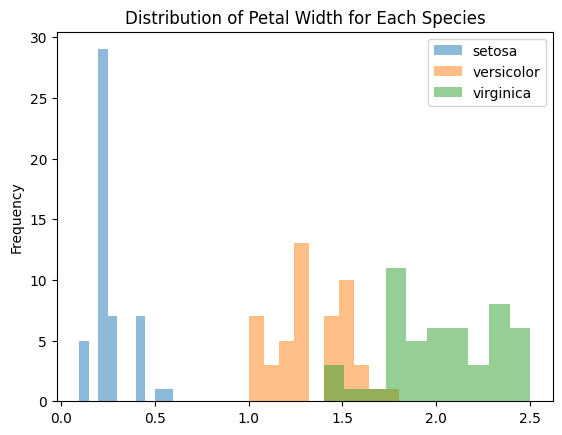

In [11]:
# Histogram
# Alpha changes the opacity
iris.groupby('species')['petal_width'].plot(kind='hist', alpha=0.5, legend=True, title='Distribution of Petal Width for Each Species')

<Axes: title={'center': 'sepal_length'}, xlabel='species'>

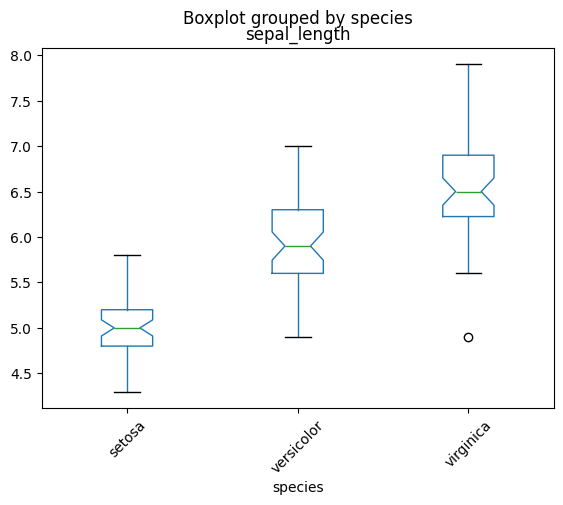

In [12]:
# Boxplot
iris.boxplot(column='sepal_length', by='species', notch=True, grid=False, rot=45)

In [13]:
# Use help function to see the customizable parameters
help(iris.boxplot)

# Or view the DataFrame plot API: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

Help on method boxplot_frame in module pandas.plotting._core:

boxplot_frame(column=None, by=None, ax=None, fontsize: 'int | None' = None, rot: 'int' = 0, grid: 'bool' = True, figsize: 'tuple[float, float] | None' = None, layout=None, return_type=None, backend=None, **kwargs) method of pandas.core.frame.DataFrame instance
    Make a box plot from DataFrame columns.
    
    Make a box-and-whisker plot from DataFrame columns, optionally grouped
    by some other columns. A box plot is a method for graphically depicting
    groups of numerical data through their quartiles.
    The box extends from the Q1 to Q3 quartile values of the data,
    with a line at the median (Q2). The whiskers extend from the edges
    of box to show the range of the data. By default, they extend no more than
    `1.5 * IQR (IQR = Q3 - Q1)` from the edges of the box, ending at the farthest
    data point within that interval. Outliers are plotted as separate dots.
    
    For further details see
    Wikipedia'

### Matplotlib

##### Two primary ways to make Matplotlib plots:
* Implicitly
* Explicitly

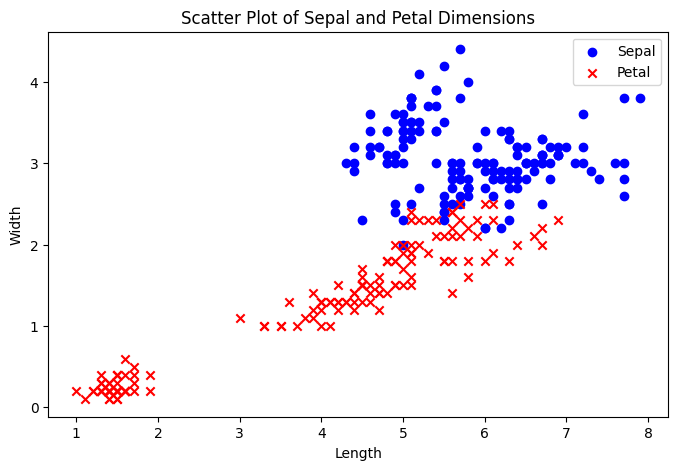

In [14]:
# Scatter plot using the implicit method (plt.scatter)
plt.figure(figsize=(8, 5))  # Set the figure size
plt.scatter(iris['sepal_length'], iris['sepal_width'], c='blue', marker='o', label='Sepal')
plt.scatter(iris['petal_length'], iris['petal_width'], c='red', marker='x', label='Petal')

# Set plot labels and title
plt.xlabel('Length')
plt.ylabel('Width')
plt.title('Scatter Plot of Sepal and Petal Dimensions')
plt.legend()  # Display legend

# Show the plot
plt.show()

In [ ]:
# Scatter plot using the explicit method (ax.scatter)
fig, ax = plt.subplots(figsize=(8, 5))  # Create a figure and axis explicitly
ax.scatter(x=iris['sepal_length'], y=iris['sepal_width'], c='blue', marker='o', label='Sepal')
ax.scatter(x=iris['petal_length'], y=iris['petal_width'], c='red', marker='x', label='Petal')

# Set plot labels and title
ax.set_xlabel('Length')
ax.set_ylabel('Width')
ax.set_title('Scatter Plot of Sepal and Petal Dimensions')
ax.legend()  # Display legend

# Show the plot
plt.show()

In the implicit method, we use plt.scatter directly on the current axis (plt), while in the explicit method, we create a figure and axis explicitly using plt.subplots, and then use the ax.scatter method. Both methods achieve the same scatter plot, but the explicit method gives you more control over the figure and axis properties.

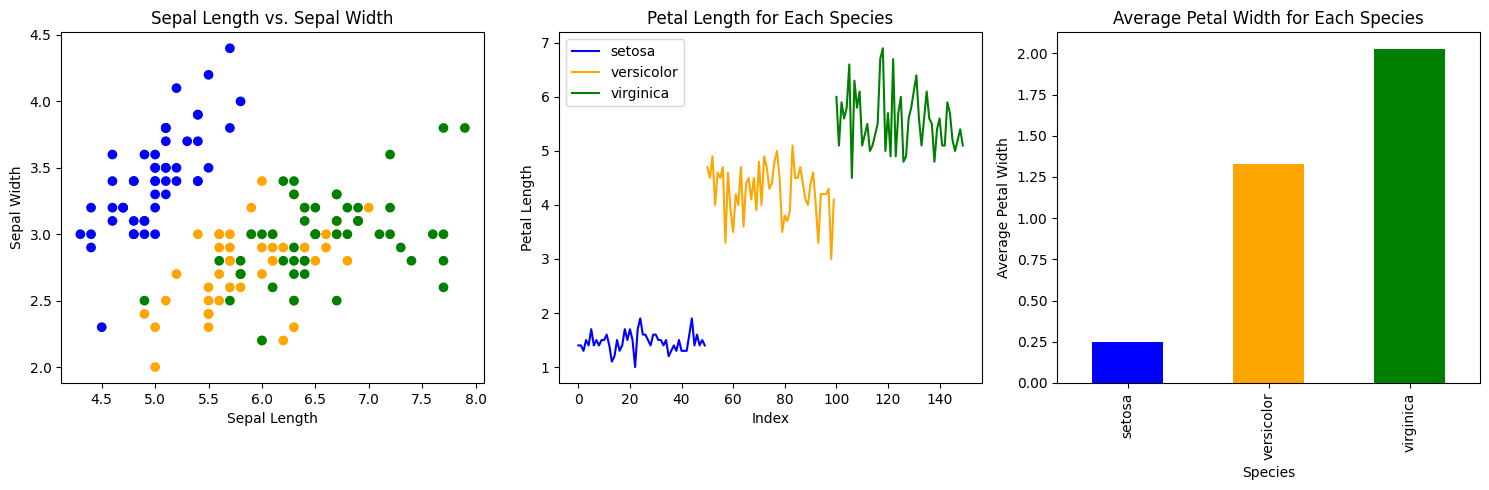

In [15]:
# Create a figure and axis with three subplots side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

colorMap = {
    'setosa': 'blue',
    'versicolor': 'orange',
    'virginica': 'green'
}

# Plot 1: Scatter plot of sepal length vs. sepal width
colors = iris.species.map(colorMap)
axes[0].scatter(x=iris['sepal_length'], y=iris['sepal_width'], c=colors, marker='o')
axes[0].set_title('Sepal Length vs. Sepal Width')
axes[0].set_xlabel('Sepal Length')
axes[0].set_ylabel('Sepal Width')

# Plot 2: Line plot of petal length for each species
for species, group in iris.groupby('species'):
    axes[1].plot(group['petal_length'], label=species, color=colorMap[species])

axes[1].set_title('Petal Length for Each Species')
axes[1].set_xlabel('Index')
axes[1].set_ylabel('Petal Length')
axes[1].legend()

# Plot 3: Bar plot of average petal width for each species
average_petal_width = iris.groupby('species')['petal_width'].mean()
average_petal_width.plot(kind='bar', ax=axes[2], color=colorMap.values())
axes[2].set_title('Average Petal Width for Each Species')
axes[2].set_xlabel('Species')
axes[2].set_ylabel('Average Petal Width')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

### Seaborn

Built over Matplotlib, but generally easier to use than Matplotlib, especially when using DataFrames. However, you get less control over your plots

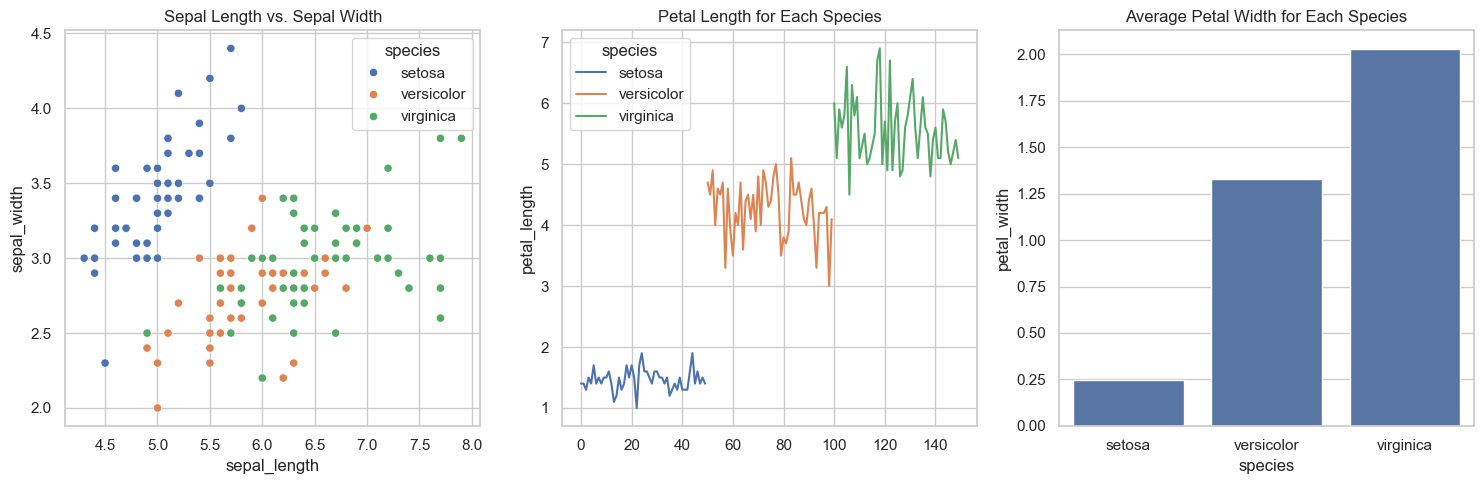

In [16]:
# Load the iris dataset
iris = sns.load_dataset('iris')

# Set the overall style for seaborn
sns.set(style='whitegrid')

# Create a figure with three subplots side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1: Scatter plot of sepal length vs. sepal width
sns.scatterplot(data=iris, x='sepal_length', y='sepal_width', hue='species', ax=axes[0])
axes[0].set_title('Sepal Length vs. Sepal Width')

# Plot 2: Line plot of petal length for each species
sns.lineplot(data=iris, x=range(len(iris)), y='petal_length', hue='species', ax=axes[1])
axes[1].set_title('Petal Length for Each Species')

# Plot 3: Bar plot of average petal width for each species
sns.barplot(data=iris, x='species', y='petal_width', ax=axes[2], errorbar=None)
axes[2].set_title('Average Petal Width for Each Species')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


In [ ]:
# Create a scatter plot with regression lines for each species
plt.figure(figsize=(10, 6))

# Scatter plot with different colors for each species
sns.scatterplot(data=iris, x='sepal_length', y='sepal_width', hue='species', palette='viridis')

# Regression lines for each species with different line styles
sns.regplot(data=iris[iris['species'] == 'setosa'], x='sepal_length', y='sepal_width', scatter=False, ax=plt.gca(), line_kws={'linestyle': '--', 'color': 'blue'})
sns.regplot(data=iris[iris['species'] == 'versicolor'], x='sepal_length', y='sepal_width', scatter=False, ax=plt.gca(), line_kws={'linestyle': '-.', 'color': 'orange'})
sns.regplot(data=iris[iris['species'] == 'virginica'], x='sepal_length', y='sepal_width', scatter=False, ax=plt.gca(), line_kws={'linestyle': ':', 'color': 'green'})

# Customize the plot
plt.title('Scatter Plot with Regression Lines for Sepal Dimensions')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

# Set different axes limits for each species
plt.xlim(4, 8)
plt.ylim(1.5, 5.5)

# Show the plot
plt.legend(title='Species')
plt.show()


In [ ]:
# Load the iris dataset
iris = sns.load_dataset('iris')

# Set the overall style for seaborn
sns.set(style='whitegrid')

# Create a figure with three subplots side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1: Scatter plot of sepal length vs. sepal width
sns.scatterplot(data=iris, x='sepal_length', y='sepal_width', hue='species', ax=axes[0])
sns.regplot(data=iris[iris['species'] == 'setosa'], x='sepal_length', y='sepal_width', scatter=False, ax=axes[0], line_kws={'linestyle': '--', 'color': 'blue'})
sns.regplot(data=iris[iris['species'] == 'versicolor'], x='sepal_length', y='sepal_width', scatter=False, ax=axes[0], line_kws={'linestyle': '-.', 'color': 'orange'})
sns.regplot(data=iris[iris['species'] == 'virginica'], x='sepal_length', y='sepal_width', scatter=False, ax=axes[0], line_kws={'linestyle': ':', 'color': 'green'})
axes[0].set_title('Sepal Length vs. Sepal Width')

# Plot 2: Line plot of petal length for each species
sns.lineplot(data=iris, x=range(len(iris)), y='petal_length', hue='species', ax=axes[1])
axes[1].set_title('Petal Length for Each Species')

# Plot 3: Bar plot of average petal width for each species
sns.barplot(data=iris, x='species', y='petal_width', ax=axes[2], errorbar=None)
axes[2].set_title('Average Petal Width for Each Species')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


In [ ]:
# Set the overall style for seaborn
sns.set(style='ticks')

# Create a scatter matrix plot for the iris dataset
sns.pairplot(iris, hue='species', palette='viridis', markers=['o', 's', 'D'])

# Customize the plot
plt.suptitle('Scatter Matrix Plot of Iris Dataset', y=1.02)
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the iris dataset
iris = sns.load_dataset('iris')

# Set the overall style and color palette for seaborn
sns.set(style='whitegrid')
color_palette = sns.color_palette("pastel", len(iris['species'].unique()))

# Create a subplot with different Seaborn plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Violin plot of petal length for each species
sns.violinplot(x='species', y='petal_length', data=iris, ax=axes[0], palette=color_palette)
axes[0].set_title('Violin Plot of Petal Length')

# Plot 2: Swarm plot of sepal length for each species
sns.swarmplot(x='species', y='sepal_length', data=iris, ax=axes[1], palette=color_palette)
axes[1].set_title('Swarm Plot of Sepal Length')

# Plot 3: Box plot of petal width for each species
sns.boxplot(x='species', y='petal_width', data=iris, ax=axes[2], palette=color_palette)
axes[2].set_title('Box Plot of Petal Width')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


In [ ]:
# Set the overall style for seaborn
sns.set(style='whitegrid')

# Melt the dataframe to have 'sepal_length' and 'sepal_width' in the same column
melted_iris = iris.melt(id_vars='species', value_vars=['sepal_length', 'sepal_width'], var_name='sepal_dimension')

# Create a violin plot of sepal length and sepal width
plt.figure(figsize=(10, 6))
sns.violinplot(x='sepal_dimension', y='value', hue='species', data=melted_iris, inner='quartile', palette='pastel')

# Customize the plot
plt.title('Violin Plot of Sepal Dimensions for Each Species')
plt.xlabel('Sepal Dimension')
plt.ylabel('Value')

# Show the plot
plt.show()

### Matplotlib vs. Seaborn

In [ ]:
# Generate random data for the example
np.random.seed(42)
x = np.random.rand(50)
y = 2 * x + 1 + 0.1 * np.random.randn(50)

# Matplotlib scatter plot with customization
plt.figure(figsize=(8, 5))
plt.scatter(x, y, color='blue', marker='o', label='Data points')
plt.plot(x, 2 * x + 1, color='red', linestyle='--', label='True Line')
plt.title('Matplotlib Scatter Plot')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
data = pd.DataFrame({'X': x, 'Y': y})

# Seaborn scatter plot with customization
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='X', y='Y', color='blue', marker='o', label='Data points')
sns.lineplot(data=data, x='X', y=2 * x + 1, color='red', linestyle='--', label='True Line')
plt.title('Seaborn Scatter Plot')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some random data for the example
np.random.seed(42)
data = np.random.randn(20, 10)

# Matplotlib subplot customization
fig, axs = plt.subplots(2, 3, figsize=(12, 8), gridspec_kw={'width_ratios': [1, 2, 3], 'height_ratios': [3, 2]})
fig.suptitle('Matplotlib Subplot Customization')

# Plot data in subplots
for i in range(2):
    for j in range(3):
        axs[i, j].plot(data[i + j], label=f'Subplot {i + 1}-{j + 1}')
        axs[i, j].legend()

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some random data for the example
np.random.seed(42)
data = np.random.randn(20, 10)

# Matplotlib subplot customization
fig, axs = plt.subplots(2, 3, figsize=(12, 8), gridspec_kw={'width_ratios': [1, 2, 3], 'height_ratios': [3, 2]})
fig.suptitle('Matplotlib Subplot Customization')

# Plot data in subplots
for i in range(2):
    for j in range(3):
        axs[i, j].plot(data[i + j], label=f'Subplot {i + 1}-{j + 1}')
        axs[i, j].legend()

plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Generate some random data for the example
np.random.seed(42)
data = np.random.randn(20, 10)

# Seaborn subplot (limited customization)
plt.figure(figsize=(12, 8))
plt.suptitle('Seaborn Subplot (Limited Customization)')

# Plot data in subplots
for i in range(1, 7):
    plt.subplot(2, 3, i)
    sns.lineplot(data=data[i - 1], label=f'Subplot {i}')
    plt.legend()

plt.tight_layout()
plt.show()


### Anscombe's Quartet

In [ ]:
# Load Anscombe's quartet dataset from Seaborn
anscombe = sns.load_dataset("anscombe")

# Print the means of each dataset
print(f'''
Dataset I Mean:
{anscombe[anscombe.dataset == 'I'].mean()}
Dataset II Mean:
{anscombe[anscombe.dataset == 'II'].mean()}
Dataset III Mean:
{anscombe[anscombe.dataset == 'II'].mean()}
Dataset IV Mean:
{anscombe[anscombe.dataset == 'IV'].mean()}
''')

# Display the dataset
#print(anscombe)

In [ ]:
# Plotting Anscombe's quartet
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Plot 1
sns.scatterplot(data=anscombe[anscombe['dataset'] == 'I'], x='x', y='y', ax=axes[0, 0])
axes[0, 0].set_title('Dataset I')

# Plot 2
sns.scatterplot(data=anscombe[anscombe['dataset'] == 'II'], x='x', y='y', ax=axes[0, 1])
axes[0, 1].set_title('Dataset II')

# Plot 3
sns.scatterplot(data=anscombe[anscombe['dataset'] == 'III'], x='x', y='y', ax=axes[1, 0])
axes[1, 0].set_title('Dataset III')

# Plot 4
sns.scatterplot(data=anscombe[anscombe['dataset'] == 'IV'], x='x', y='y', ax=axes[1, 1])
axes[1, 1].set_title('Dataset IV')

# Add a global title
fig.suptitle("Anscombe's Quartet")

# Show the plots
plt.tight_layout()
plt.show()

### 2 y-axes

In [ ]:
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

data = iris[iris.species == 'setosa']

# Seaborn scatter plot on the left y-axis
sns.scatterplot(data=data, x='sepal_length', y='sepal_width', color='blue', ax=ax1)

# Create a second y-axis on the right
ax2 = ax1.twinx()

# Seaborn scatter plot on the right y-axis
sns.scatterplot(data=data, x='sepal_length', y='petal_length', color='green', ax=ax2, marker='s')

# Customize the plot
ax1.set_title('Seaborn Plot with Two Y-Axes for Setosa specie')
ax1.set_xlabel('Sepal Length')
ax1.set_ylabel('Sepal Width', color='blue')
ax2.set_ylabel('Petal Length', color='green')

# Show the plot
plt.show()


In [ ]:
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Matplotlib scatter plot on the left y-axis
ax1.scatter(data['sepal_length'], data['sepal_width'], color='blue', label='Sepal Width')
ax1.set_xlabel('Sepal Length')
ax1.set_ylabel('Sepal Width', color='blue')
#ax1.legend(loc='upper left')

# Create a second y-axis on the right
ax2 = ax1.twinx()

# Matplotlib scatter plot on the right y-axis
ax2.scatter(data['sepal_length'], data['petal_length'], color='green', marker='s', label='Petal Length')
ax2.set_ylabel('Petal Length', color='green')
#ax2.legend(loc='upper right')

# Customize the plot
plt.title('Matplotlib Plot with Two Y-Axes for Setosa specie')

# Show the plot
plt.show()


# Homework Tips

* The first visualization should resemble something like: 
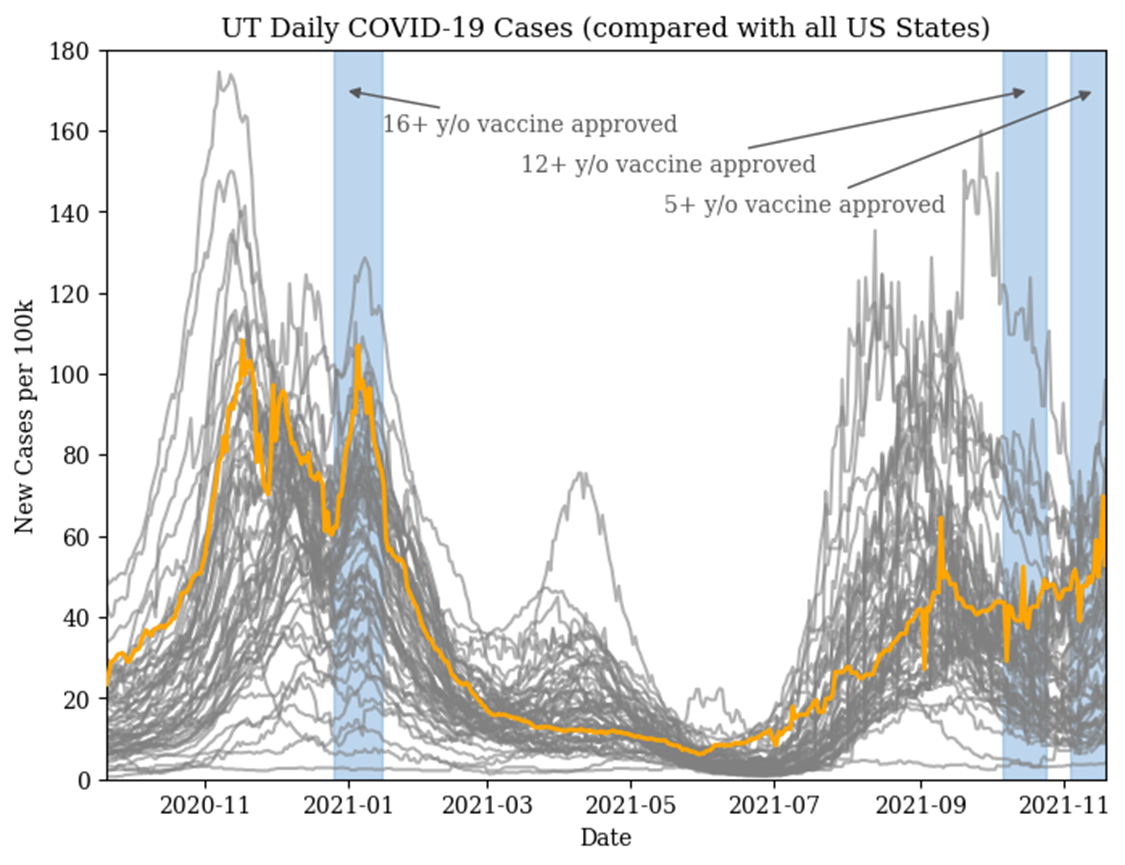

* Some visualizations might be easier with Matplotlib, some easier with Seaborn
* Some may require a little bit of data exploration/cleaning/setting up the dataset to be easily usable in Matplotlib/Seaborn
* ChatGPT and the Matplotlib/Seaborn APIs can be very helpful! Especially with the time-series and stacked bar chart, as I didn't go into those in-depth.
* You can create a .py file or .ipynb, whichever is easier for you.